In [2]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

In [31]:

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Hidden layer added to match pt1
hidden = Dense(128, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [32]:
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [33]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


In [44]:
# xtest noisy was used twice here and was presumed to be a mistake and after change improved performance
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0178 - accuracy: 0.0186 - val_loss: 0.0179 - val_accuracy: 0.0173
Epoch 2/10
235/235 [==============================] - 2s 11ms/step - loss: 0.0176 - accuracy: 0.0194 - val_loss: 0.0178 - val_accuracy: 0.0167
Epoch 3/10
235/235 [==============================] - 2s 11ms/step - loss: 0.0174 - accuracy: 0.0184 - val_loss: 0.0176 - val_accuracy: 0.0196
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0173 - accuracy: 0.0199 - val_loss: 0.0175 - val_accuracy: 0.0195
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0172 - accuracy: 0.0195 - val_loss: 0.0175 - val_accuracy: 0.0171
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0171 - accuracy: 0.0197 - val_loss: 0.0174 - val_accuracy: 0.0200
Epoch 7/10
235/235 [==============================] - 2s 11ms/step - loss: 0.0170 - accuracy: 0.0207 - val_loss: 0.0173 - val_accuracy: 0.0204

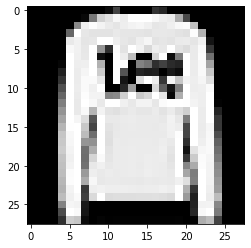

In [45]:
#Original
plt.imshow(x_test[1].reshape(28,28), cmap="gray")

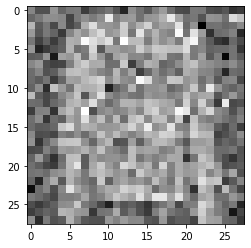

In [46]:
# Noisy original
plt.imshow(x_test_noisy[1].reshape(28,28), cmap="gray")

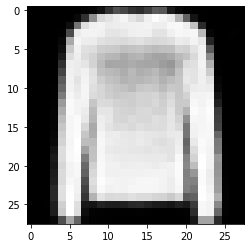

In [47]:
# Regular decoded
prediction = autoencoder.predict([x_test[1].reshape(1,784)])
plt.imshow(prediction.reshape(28,28), cmap="gray")
# print(prediction)

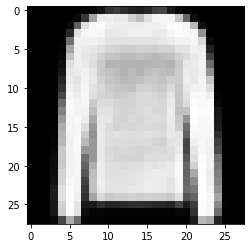

In [48]:
# Noisy decoded
prediction = autoencoder.predict([x_test_noisy[1].reshape(1,784)])
plt.imshow(prediction.reshape(28,28), cmap="gray")
# print(prediction)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


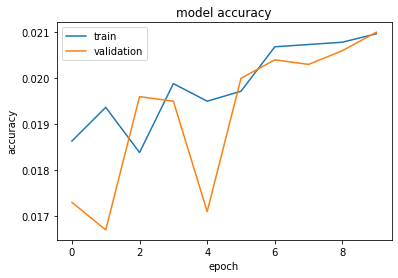

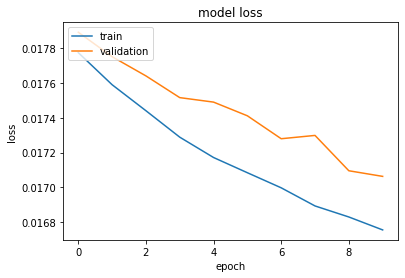

In [49]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()